In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

song100 = pd.read_csv("songDataTop100ByYearfixtest.csv")

Text(0.5, 0, 'Years')

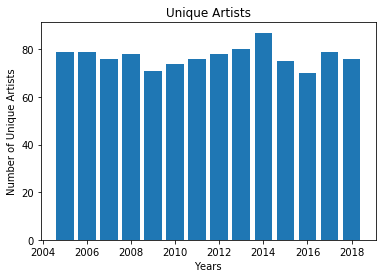

In [11]:
unique_artists = []
for x in range(2005, 2019): # loop through years
    artists = [] #list for all artists in specific year
    artists.append(song100.loc[song100['Year'] == x, 'Artist']) # add artists to lists
    unique_artists.append(len(set(artists[0]))) # remove duplicates
artists= plt.bar([x for x in range(2005, 2019)], unique_artists)  # plot unique artists

# change title and labels
plt.title("Unique Artists")
plt.ylabel('Number of Unique Artists')
plt.xlabel('Years')


Text(0.5, 1.0, 'Song Attributes')

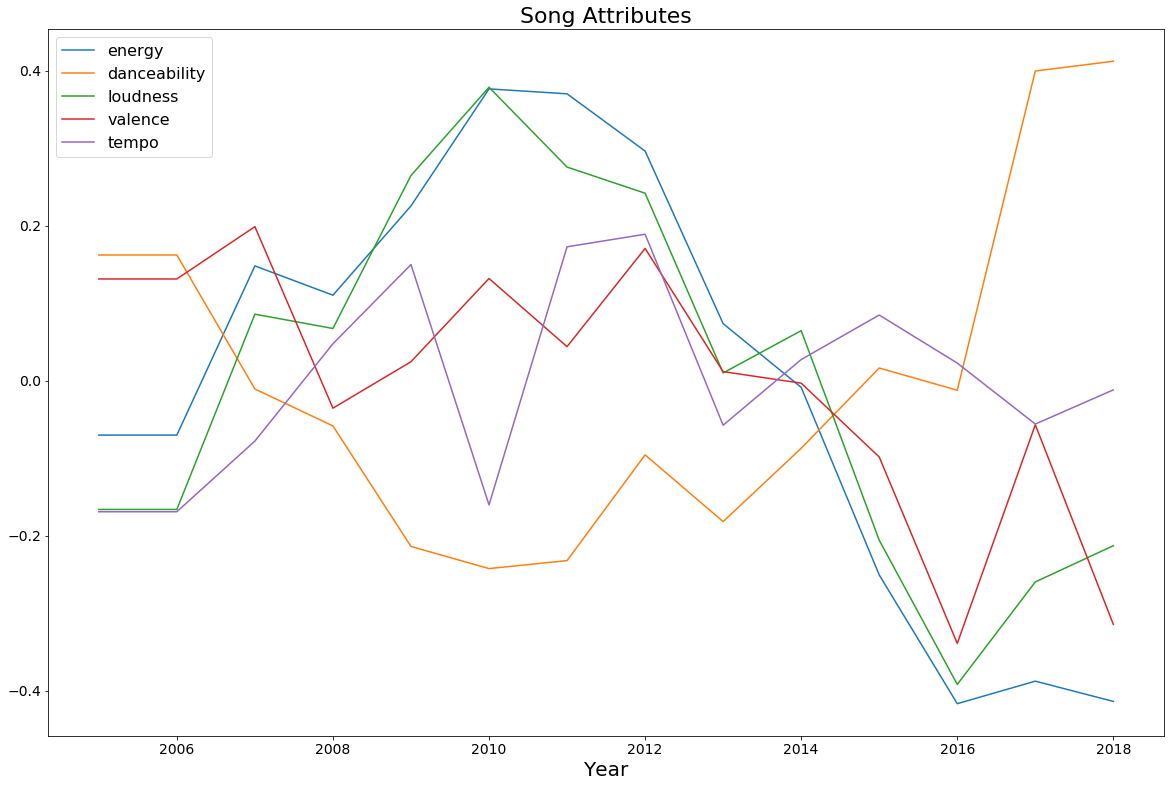

In [12]:
normSong100 = song100.copy()
normSong100.rename(columns = {'Duration(min)':'Duration'}, inplace = True)

#normalize attributes
normSong100['energy'] = ((song100['energy'] - song100['energy'].mean())/
                                 (song100['energy'].std()))
normSong100['danceability'] = ((song100['danceability'] - song100['danceability'].mean())/
                               (song100['danceability'].std()))
normSong100['loudness'] = ((song100['loudness'] - song100['loudness'].mean())/
                               (song100['loudness'].std()))
normSong100['valence'] = ((song100['valence'] - song100['valence'].mean())/
                               (song100['valence'].std()))
normSong100['tempo'] = ((song100['tempo'] - song100['tempo'].mean())/
                               (song100['tempo'].std()))
plt.figure(figsize=(20,13))
sns.lineplot(x = 'Year', y = 'energy', data = normSong100, ci = None)
#Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
#Typically, energetic tracks feel fast, loud, and noisy. 
#Perceptual features contributing to this attribute include 
#dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

sns.lineplot(x = 'Year', y = 'danceability', data = normSong100, ci = None)
#Danceability describes how suitable a track is for dancing based on a combination of musical elements 
#including tempo, rhythm stability, beat strength, and overall regularity. 
#A value of 0.0 is least danceable and 1.0 is most danceable

sns.lineplot(x = 'Year', y = 'loudness', data = normSong100, ci = None)
#The overall loudness of a track in decibels (dB). 
#Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
#Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
#Values typical range between -60 and 0 db.

sns.lineplot(x = 'Year', y = 'valence', data = normSong100, ci = None)
#A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
#Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric) 
#Tracks with low valence sound more negative (e.g. sad, depressed, angry).

songattributes = sns.lineplot(x = 'Year', y = 'tempo', data = normSong100, ci = None)
#The overall estimated tempo of a track in beats per minute (BPM). 
#Tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#changing labels and legends
songattributes.set_xlabel('Year', fontsize = 20)
songattributes.set_ylabel('', fontsize = 20)
songattributes.tick_params(labelsize = 14)
songattributes.legend(labels = ['energy','danceability', 'loudness', 'valence', 'tempo'], fontsize = 16)
songattributes.set_title('Song Attributes', fontsize = 22)


[None, None]

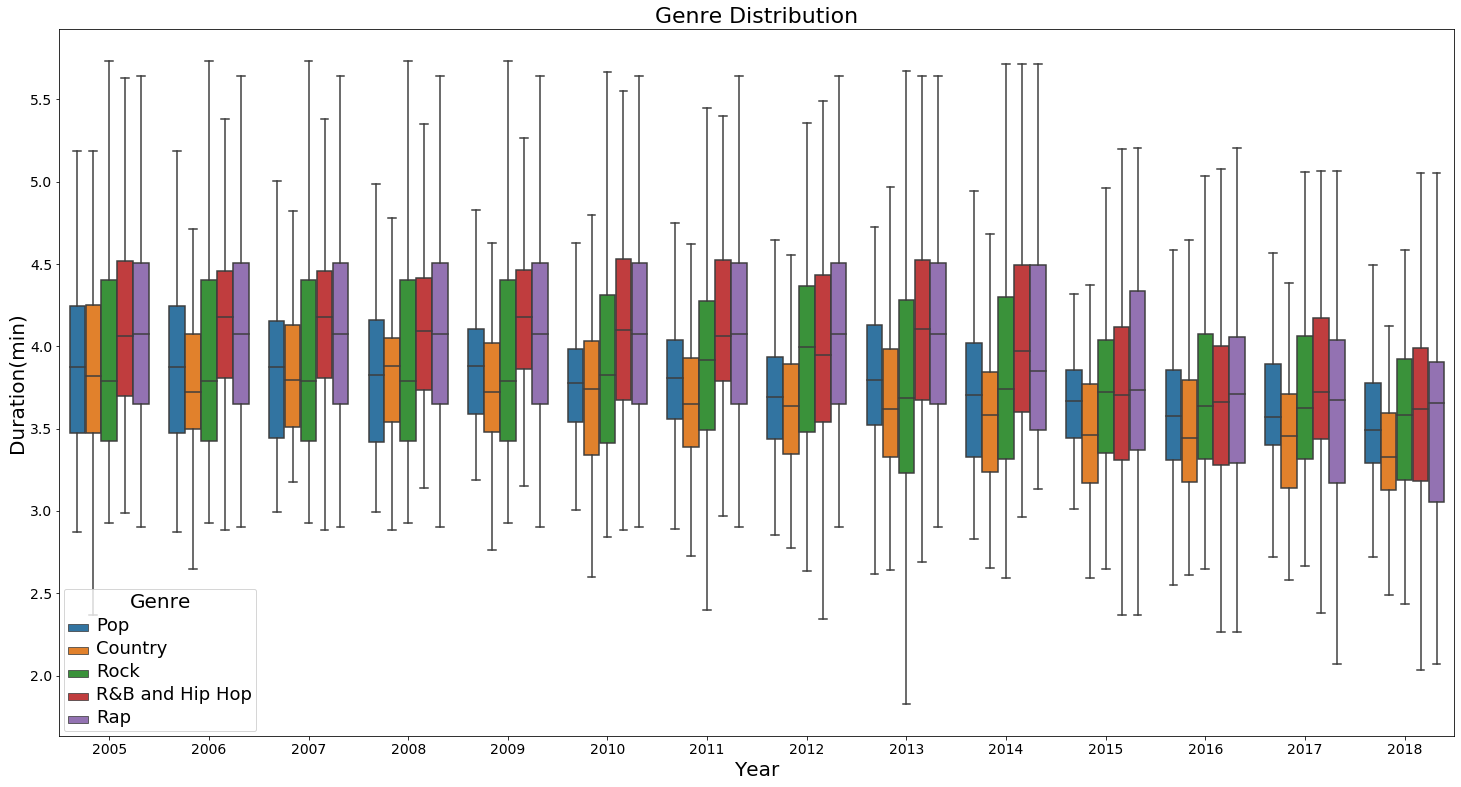

In [14]:
genre100 = pd.read_csv("genreData.csv")
genre100['Duration(ms)'] = genre100['Duration(ms)']/60000 # changes ms to min
genre100.rename(columns = {'Duration(ms)':'Duration(min)'}, inplace = True) 
plt.figure(figsize=(25,13))

#removed genres to make visualzations simpler
modifiedgenre = genre100[genre100.Genre != 'hot-christian']
modifiedgenre = modifiedgenre[modifiedgenre.Genre != 'rhythmic']
modifiedgenre = modifiedgenre[modifiedgenre.Genre != 'hot-latin']
modifiedgenre = modifiedgenre[modifiedgenre.Genre != 'hot-dance-electronic-']
modifiedgenre = modifiedgenre[modifiedgenre.Genre != 'hot-gospel']
modifiedgenre = modifiedgenre[modifiedgenre.Genre != 'smooth-jazz']

#combined pop and adult pop
modifiedgenre['Genre'] = modifiedgenre['Genre'].replace('adult-pop', 'pop')

#changed names of genres
d = {'hot-country':'Country', 'pop':'Pop', 'hot-rock':'Rock', 'hot-r-and-and-b-hip-hop':'R&B and Hip Hop', 'hot-rap':'Rap'}
modifiedgenre = modifiedgenre.replace(d)
g = sns.boxplot(x="Year", hue="Genre", y="Duration(min)", data=modifiedgenre, showfliers=False)
g.set_title('Genre Distribution',fontsize = 22)
g.set_xlabel('Year', fontsize = 20)
g.set_ylabel('Duration(min)', fontsize = 20)
g.tick_params(labelsize = 14)

plt.setp(g.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='20') # for legend title



[None, None]

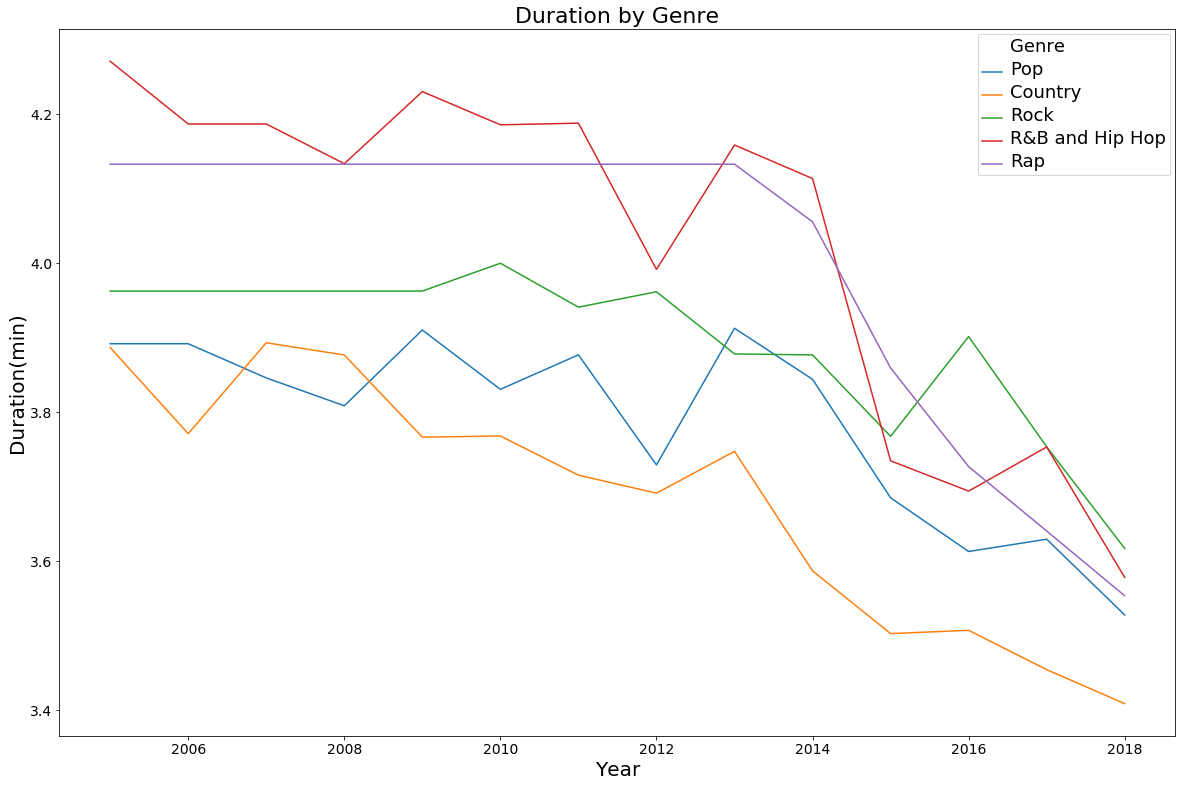

In [15]:
plt.figure(figsize=(20,13))
a = sns.lineplot(x='Year', y='Duration(min)', data=modifiedgenre, 
              hue='Genre', ci=None)

#change title and labels
a.set_title('Duration by Genre',fontsize = 22)
a.set_xlabel('Year', fontsize = 20)
a.set_ylabel('Duration(min)', fontsize = 20)
a.tick_params(labelsize = 14)

plt.setp(a.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(a.get_legend().get_title(), fontsize='20') # for legend title

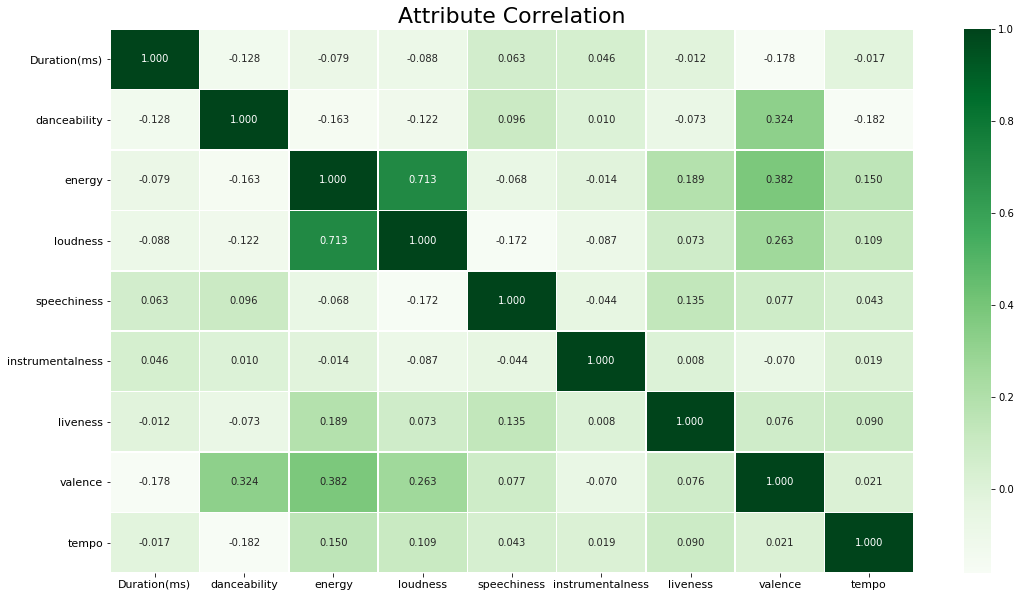

In [10]:
df = song100[["Duration(ms)", "danceability", "energy", "loudness", "speechiness", "instrumentalness","liveness","valence", "tempo"]]
f,ax = plt.subplots(figsize=(18, 10))
a = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax, cmap="Greens")

#change title and tick size
a.set_title("Attribute Correlation", fontsize = 22)
a.tick_params(labelsize = 11)
